### Draw a network diagram of the _C. elegans_ connectome based on Witvliet et al. 2021.

Attributes: 
 ['edge_attr', 'pos', 'node_type', 'num_classes', 'n_id', 'edge_index', 'x', 'idx_to_neuron', 'y'] 
 Num. nodes 302, Num. edges 4396, Num. node features 1024
	Has isolated nodes: False
	Has self-loops: True
	Is undirected: False
	Is directed: True


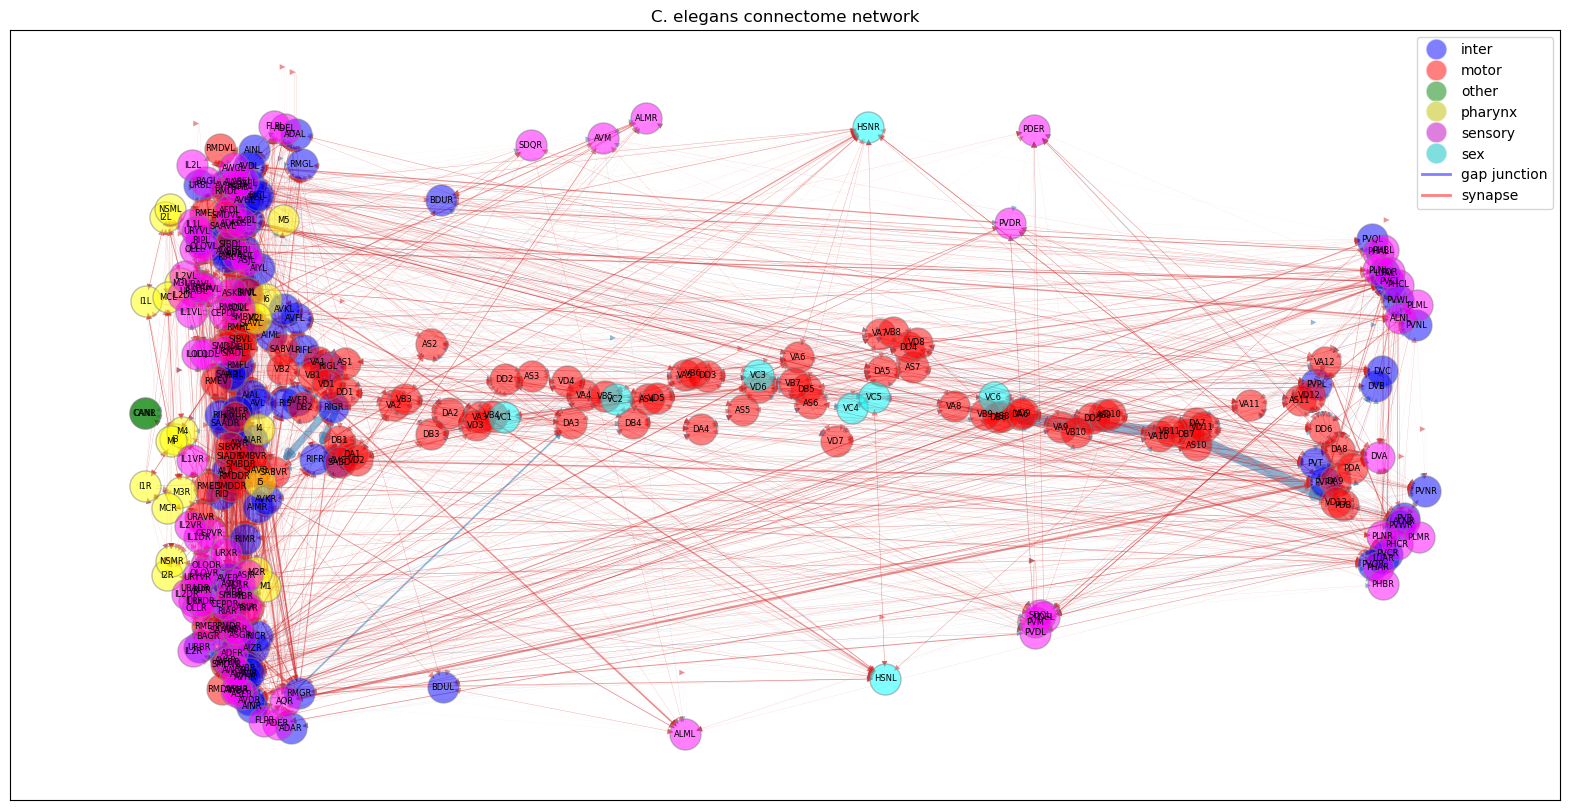

In [1]:
# imports
import os
import torch
from visualize._utils import draw_connectome
from utils import ROOT_DIR
from torch_geometric.data import Data

# load the raw data
graph_tensors = torch.load(
    os.path.join(ROOT_DIR, "data", "processed", "connectome", "graph_tensors.pt")
)

# make the graph
graph = Data(**graph_tensors)

# investigate the graph
print(
    "Attributes:",
    "\n",
    graph.keys,
    "\n",
    f"Num. nodes {graph.num_nodes}, Num. edges {graph.num_edges}, "
    f"Num. node features {graph.num_node_features}",
    end="\n",
)
print(f"\tHas isolated nodes: {graph.has_isolated_nodes()}")
print(f"\tHas self-loops: {graph.has_self_loops()}")
print(f"\tIs undirected: {graph.is_undirected()}")
print(f"\tIs directed: {graph.is_directed()}")

# draw the connectome
draw_connectome(graph)